# Exploring the Relationship Between Screen Time Patterns and Insomnia-Related Sleep Disturbances

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

## Data Loading and Cleaning

In [188]:
df = pd.read_csv('C:\\Users\\Blix\\Documents\\GitHub\\CCDATSCL_PROJECT\\merged_dataset.csv')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             91 non-null     object
 1   Total Screen Time                91 non-null     int64 
 2   Total Number of Notifications    91 non-null     int64 
 3   Total Number of Unlocks          91 non-null     int64 
 4   Social Media Usage               91 non-null     int64 
 5   Video App Usage                  91 non-null     int64 
 6   Games Usage                      91 non-null     int64 
 7   0 to 6                           91 non-null     int64 
 8   6 to 12                          91 non-null     int64 
 9   12 to 18                         91 non-null     int64 
 10  18 to 24                         91 non-null     int64 
 11  Sleep Start (Time Previous Day)  91 non-null     int64 
 12  Sleep End (Time Waken)           91 no

In [190]:
df.head()

,Date,Total Screen Time,Total Number of Notifications,Total Number of Unlocks,Social Media Usage,Video App Usage,Games Usage,0 to 6,6 to 12,12 to 18,18 to 24,Sleep Start (Time Previous Day),Sleep End (Time Waken),Sleep Duration,Sleep Quality,Steps
0,10/27/2025,584,545,108,208,285,42,148,75,192,163,3,10,7,2,5810
1,10/28/2025,777,521,78,259,553,0,154,30,292,340,3,10,7,2,1185
2,10/29/2025,882,440,55,152,598,202,115,243,294,300,2,11,9,3,463
3,10/30/2025,627,471,56,163,332,177,45,283,209,135,1,5,4,2,9111
4,10/31/2025,778,308,60,121,476,106,0,225,247,231,24,6,6,3,4024


In [191]:
df.describe()

,Total Screen Time,Total Number of Notifications,Total Number of Unlocks,Social Media Usage,Video App Usage,Games Usage,0 to 6,6 to 12,12 to 18,18 to 24,Sleep Start (Time Previous Day),Sleep End (Time Waken),Sleep Duration,Sleep Quality,Steps
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,551.813187,420.318681,78.879121,143.516484,320.483516,58.208791,69.131868,123.604396,187.021978,173.681319,9.065934,7.989011,6.549451,2.670330,6176.098901
std,167.445309,89.966522,26.782596,51.020772,141.790406,73.050594,78.377464,66.751925,86.382737,79.643634,9.832827,1.669960,2.212408,0.882609,3717.266224
min,123.000000,254.000000,19.000000,32.000000,57.000000,0.000000,0.000000,0.000000,44.000000,0.000000,1.000000,4.000000,1.000000,1.000000,36.000000
25%,442.000000,349.000000,56.500000,107.500000,211.000000,4.500000,0.000000,75.000000,121.500000,126.000000,2.000000,7.000000,5.000000,2.000000,3045.500000
50%,543.000000,410.000000,78.000000,135.000000,307.000000,27.000000,44.000000,120.000000,177.000000,173.000000,3.000000,8.000000,6.000000,2.000000,5832.000000
75%,672.500000,479.000000,93.500000,174.500000,416.500000,97.000000,114.000000,165.000000,247.000000,232.500000,23.000000,9.000000,8.000000,3.000000,9347.500000
max,912.000000,673.000000,158.000000,274.000000,847.000000,311.000000,329.000000,312.000000,360.000000,340.000000,24.000000,12.000000,12.000000,4.000000,16342.000000


In [192]:
# Check first and last date in the dataset in terms of Timestamp
df['Date'] = pd.to_datetime(df['Date'])
print("First date in dataset:", df['Date'].min())
print("Last date in dataset:", df['Date'].max())

First date in dataset: 2025-10-27 00:00:00
Last date in dataset: 2026-01-25 00:00:00


In [193]:
df.isna().sum()

Date                               0
Total Screen Time                  0
Total Number of Notifications      0
Total Number of Unlocks            0
Social Media Usage                 0
Video App Usage                    0
Games Usage                        0
0 to 6                             0
6 to 12                            0
12 to 18                           0
18 to 24                           0
Sleep Start (Time Previous Day)    0
Sleep End (Time Waken)             0
Sleep Duration                     0
Sleep Quality                      0
Steps                              0
dtype: int64

In [194]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

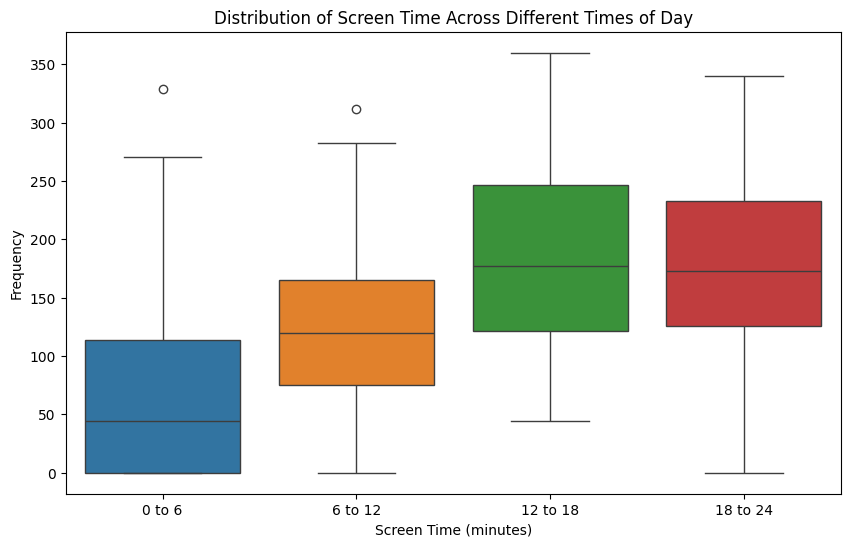

In [195]:
# Plot Box Plot Distribution of Screen Time (0 to 6, 6 to 12, 12 to 18, 18 to 24) Across Different Times of Day
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['0 to 6', '6 to 12', '12 to 18', '18 to 24']])
plt.title('Distribution of Screen Time Across Different Times of Day')
plt.xlabel('Screen Time (minutes)')
plt.ylabel('Frequency')
plt.show()

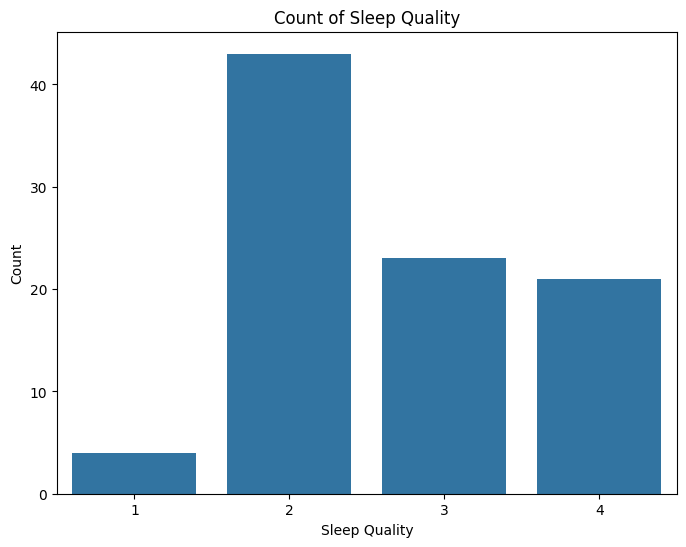

In [196]:
# Plot count plot of Sleep Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Quality', data=df)
plt.title('Count of Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()

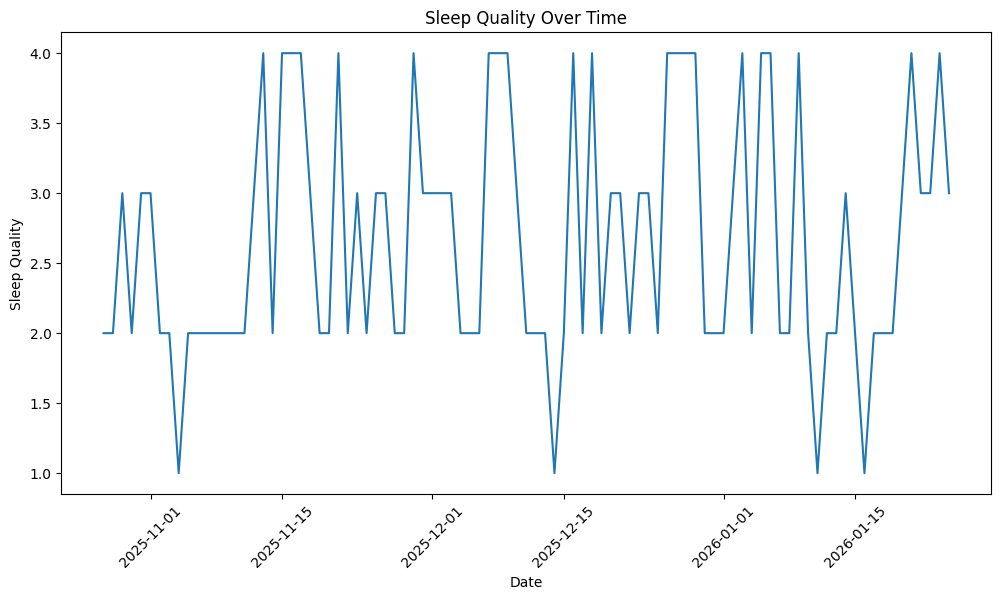

In [197]:
# Plot time series of Sleep Quality over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sleep Quality', data=df)
plt.title('Sleep Quality Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Quality')
plt.xticks(rotation=45)
plt.show()

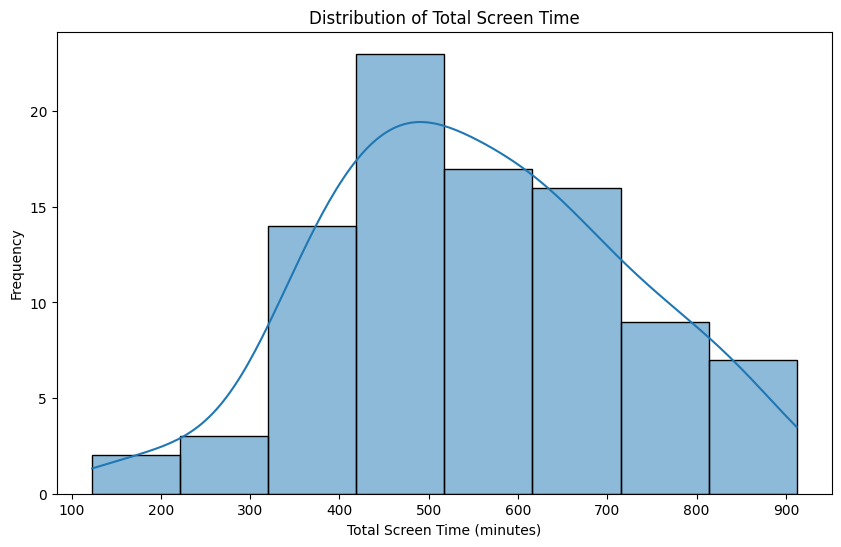

In [198]:
# Plot distribution of Total Screen Time with histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Screen Time'], kde=True)
plt.title('Distribution of Total Screen Time')
plt.xlabel('Total Screen Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [199]:
# Check skewness and kurtosis of Total Screen Time
print("Skewness of Total Screen Time:", df['Total Screen Time'].skew())
print("Kurtosis of Total Screen Time:", df['Total Screen Time'].kurtosis())

Skewness of Total Screen Time: 0.035421218195492765
Kurtosis of Total Screen Time: -0.3417423834909239


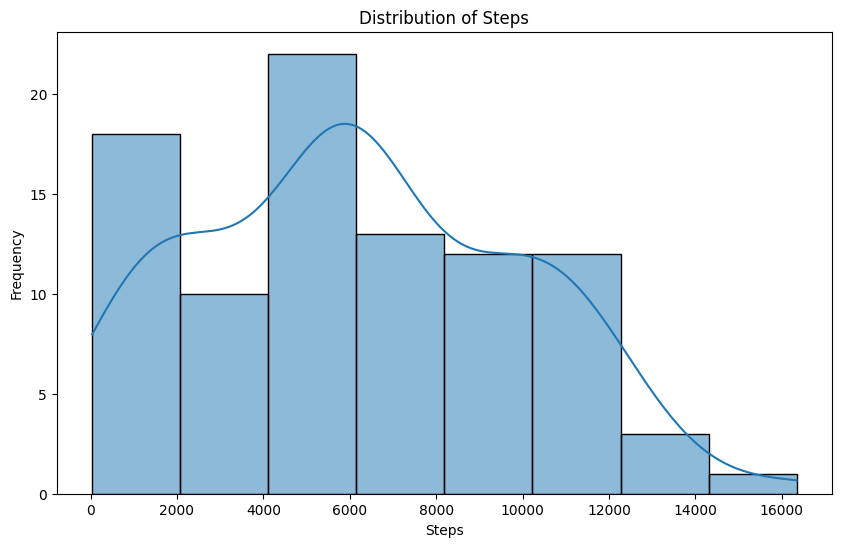

Skewness of Steps: 0.23281473994294494
Kurtosis of Steps: -0.6526694665833843


In [200]:
# Plot distribution of Steps with histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Steps'], kde=True)
plt.title('Distribution of Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()
# Check skewness and kurtosis of Steps
print("Skewness of Steps:", df['Steps'].skew())
print("Kurtosis of Steps:", df['Steps'].kurtosis())


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             91 non-null     datetime64[ns]
 1   Total Screen Time                91 non-null     int64         
 2   Total Number of Notifications    91 non-null     int64         
 3   Total Number of Unlocks          91 non-null     int64         
 4   Social Media Usage               91 non-null     int64         
 5   Video App Usage                  91 non-null     int64         
 6   Games Usage                      91 non-null     int64         
 7   0 to 6                           91 non-null     int64         
 8   6 to 12                          91 non-null     int64         
 9   12 to 18                         91 non-null     int64         
 10  18 to 24                         91 non-null     int64         


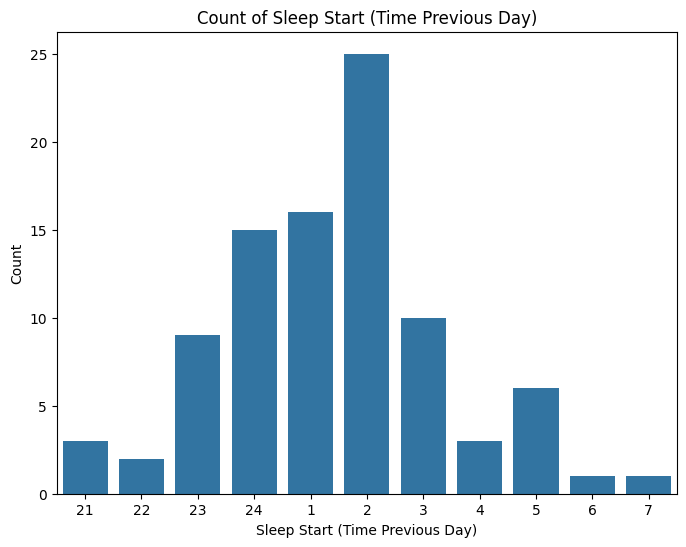

In [202]:
# Check countplot of Sleep Start (Time Previous Day). Arrange it from 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Start (Time Previous Day)', data=df, order=[21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7])
plt.title('Count of Sleep Start (Time Previous Day)')
plt.xlabel('Sleep Start (Time Previous Day)')
plt.ylabel('Count')
plt.show()

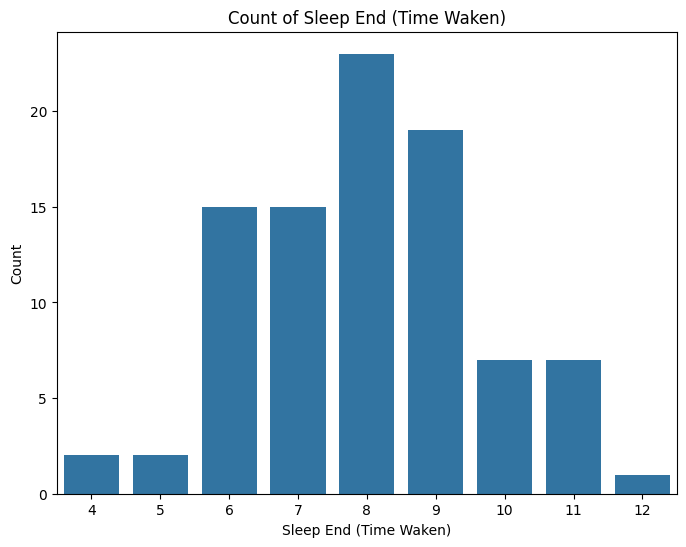

In [203]:
# Check countplot of Sleep End (Time Waken).
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep End (Time Waken)', data=df)
plt.title('Count of Sleep End (Time Waken)')
plt.xlabel('Sleep End (Time Waken)')
plt.ylabel('Count')
plt.show()

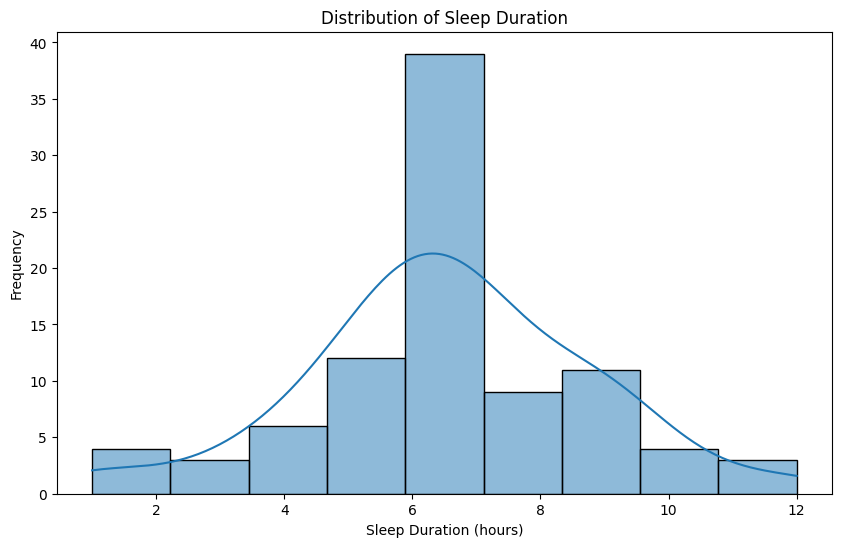

Skewness of Sleep Duration: -0.12719071862139555
Kurtosis of Sleep Duration: 0.48461291062895206


In [204]:
# Check distribution of Sleep Duration with histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()
# Check skewness and kurtosis of Sleep Duration
print("Skewness of Sleep Duration:", df['Sleep Duration'].skew())
print("Kurtosis of Sleep Duration:", df['Sleep Duration'].kurtosis())

## Feature Engineering

In [205]:
# Create steps intensity feature. Sedentary: < 5000, Active >= 5000 and <= 10000, Very Active > 10000
def categorize_steps(steps):
    if steps < 5000:
        return 'Sedentary'
    elif 5000 <= steps <= 10000:
        return 'Active'
    else:
        return 'Very Active'

df['StepsIntensity'] = df['Steps'].apply(categorize_steps)

In [206]:
df['SleepDurationMinutes'] = df['Sleep Duration'] * 60

In [207]:
# Create a feature that stores the 0 to 6 screen time for tomorrow
df['Pre_Sleep_0_6_ScreenTime'] = df['0 to 6'].shift(-1)

In [208]:
df['Effective Evening Screen Time'] = df['18 to 24'] + df['Pre_Sleep_0_6_ScreenTime']
df['Daytime Screen Time'] = df['6 to 12'] + df['12 to 18']

In [209]:
# Remove Previous_Sleep_18_24_ScreenTime and Pre_Sleep_0_6_ScreenTime features
df.drop(['Pre_Sleep_0_6_ScreenTime'], axis=1, inplace=True)

In [210]:
df['Sleep Quality'].value_counts()

Sleep Quality
2    43
3    23
4    21
1     4
Name: count, dtype: int64

In [211]:
# Create target features for insomnia-related sleep disturbances by -1 day
df['SleepQualityNextDay'] = df['Sleep Quality'].shift(-1)
df['SleepQualityNextNextDay'] = df['Sleep Quality'].shift(-2)
df['SleepDurationMinutesNextDay'] = df['SleepDurationMinutes'].shift(-1)

# Drop Original Sleep Quality and Sleep Duration features
df.drop(['Sleep Quality', 'Sleep Duration', 'SleepDurationMinutes'], axis=1, inplace=True)

In [212]:
# Create a feature for Interactive Screen Time by summing up Gaming and Social Media Screen Time
df['InteractiveScreenTime'] = df['Games Usage'] + df['Social Media Usage']
df['NonInteractiveScreenTime'] = df['Video App Usage']
# Drop Video App Usage 
df.drop(['Video App Usage'], axis=1, inplace=True)

In [213]:
# Drop Total Number of Notifications and Total Number of Unlocks, as they may not be relevant to the analysis
df.drop(columns=['Total Number of Notifications', 'Total Number of Unlocks'], inplace=True)

In [214]:
# Create Feature for High and Low Evening Screen Time. Low is <240 mins, High is >=240 mins
df['Evening Screen Time Category'] = df['Effective Evening Screen Time'].apply(lambda x: 'Low' if x < 240 else 'High')

In [215]:
# Check null values
df.isna().sum()

Date                               0
Total Screen Time                  0
Social Media Usage                 0
Games Usage                        0
0 to 6                             0
6 to 12                            0
12 to 18                           0
18 to 24                           0
Sleep Start (Time Previous Day)    0
Sleep End (Time Waken)             0
Steps                              0
StepsIntensity                     0
Effective Evening Screen Time      1
Daytime Screen Time                0
SleepQualityNextDay                1
SleepQualityNextNextDay            2
SleepDurationMinutesNextDay        1
InteractiveScreenTime              0
NonInteractiveScreenTime           0
Evening Screen Time Category       0
dtype: int64

In [216]:
# check counts of Evening Screen Time Category
df['Evening Screen Time Category'].value_counts()

Evening Screen Time Category
Low     51
High    40
Name: count, dtype: int64

In [217]:
df.dropna(inplace=True)

In [218]:
# Export to csv
df.to_csv('C:\\Users\\Blix\\Documents\\GitHub\\CCDATSCL_PROJECT\\processed_dataset.csv', index=False)

## Post Processing Visualizations

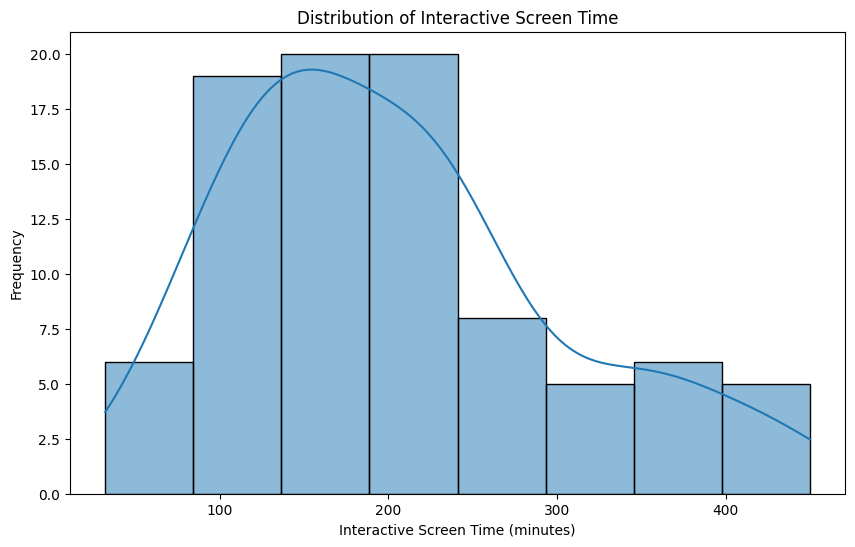

Skewness of Interactive Screen Time: 0.7424329779414522
Kurtosis of Interactive Screen Time: -0.057564237985127775


In [219]:
# Histogram of Interactive Screen Time only
plt.figure(figsize=(10, 6))
sns.histplot(df['InteractiveScreenTime'], kde=True)
plt.title('Distribution of Interactive Screen Time')
plt.xlabel('Interactive Screen Time (minutes)')
plt.ylabel('Frequency')
plt.show()
# Print Skewness and Kurtosis of Interactive Screen Time
print("Skewness of Interactive Screen Time:", df['InteractiveScreenTime'].skew())
print("Kurtosis of Interactive Screen Time:", df['InteractiveScreenTime'].kurtosis())

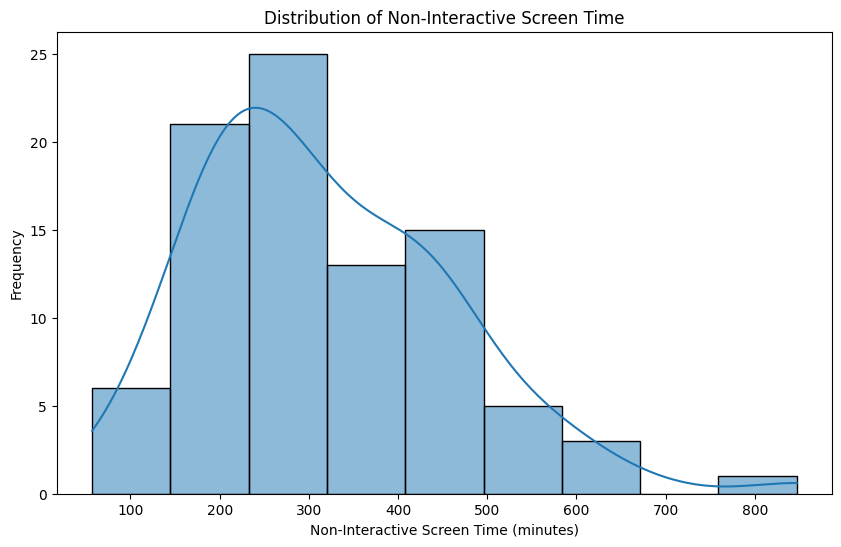

Skewness of Non-Interactive Screen Time: 0.8528976689280933
Kurtosis of Non-Interactive Screen Time: 1.082679320030428


In [220]:
# Histogram of Noninteractive Screen Time only
plt.figure(figsize=(10, 6))
sns.histplot(df['NonInteractiveScreenTime'], kde=True)
plt.title('Distribution of Non-Interactive Screen Time')
plt.xlabel('Non-Interactive Screen Time (minutes)')
plt.ylabel('Frequency')
plt.show()
# Print Skewness and Kurtosis of Noninteractive Screen Time
print("Skewness of Non-Interactive Screen Time:", df['NonInteractiveScreenTime'].skew())
print("Kurtosis of Non-Interactive Screen Time:", df['NonInteractiveScreenTime'].kurtosis())

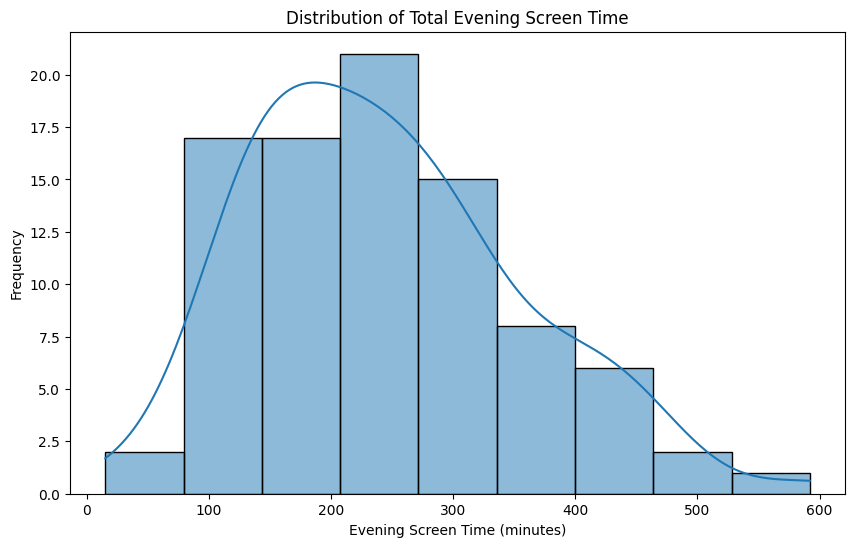

Skewness of Effective Evening Screen Time: 0.6310721014294891
Kurtosis of Effective Evening Screen Time: 0.14122664228919568


In [221]:
# Show histogram of Effective Evening Screen Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Effective Evening Screen Time'], kde=True)
plt.title('Distribution of Total Evening Screen Time')
plt.xlabel('Evening Screen Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Print Skewness and Kurtosis of Effective Evening Screen Time
print("Skewness of Effective Evening Screen Time:", df['Effective Evening Screen Time'].skew())
print("Kurtosis of Effective Evening Screen Time:", df['Effective Evening Screen Time'].kurtosis())

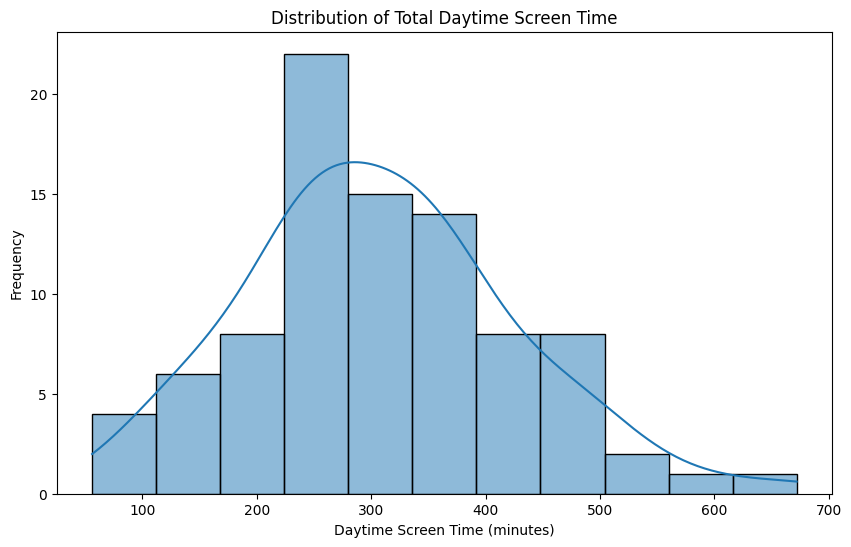

Skewness of Daytime Screen Time: 0.42869083362190685
Kurtosis of Daytime Screen Time: 0.3625697113466879


In [222]:
# Show histogram of Daytime Screen Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Daytime Screen Time'], kde=True)
plt.title('Distribution of Total Daytime Screen Time')
plt.xlabel('Daytime Screen Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Print Skewness and Kurtosis of Daytime Screen Time
print("Skewness of Daytime Screen Time:", df['Daytime Screen Time'].skew())
print("Kurtosis of Daytime Screen Time:", df['Daytime Screen Time'].kurtosis())

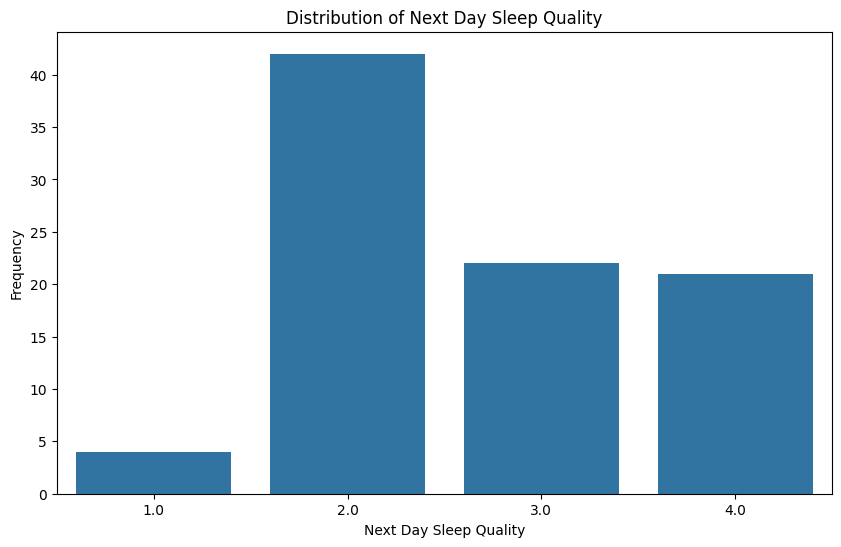

In [223]:
# Plot Count Plot of Sleep Quality Next Day
plt.figure(figsize=(10, 6))
sns.countplot(x='SleepQualityNextDay', data=df)
plt.title('Distribution of Next Day Sleep Quality')
plt.xlabel('Next Day Sleep Quality')
plt.ylabel('Frequency')
plt.show()

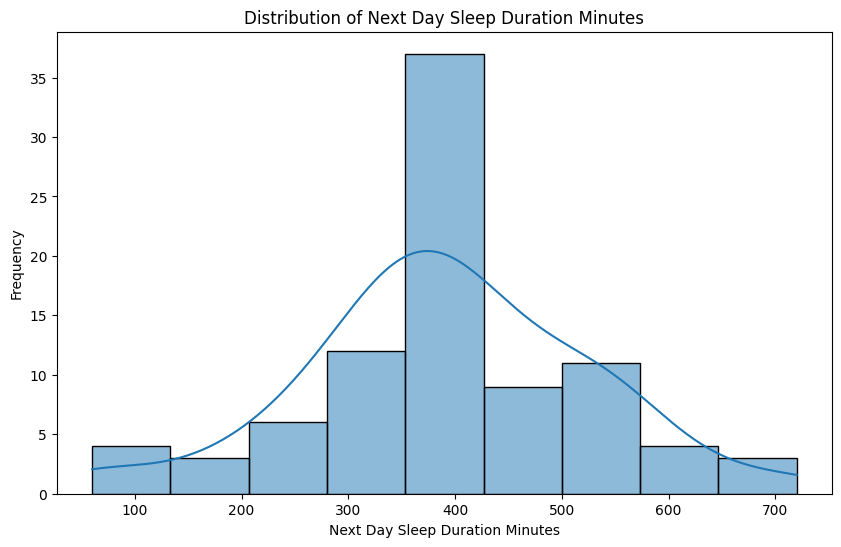

Skewness of Sleep Duration Minutes Next Day: -0.112306970270658
Kurtosis of Sleep Duration Minutes Next Day: 0.41214964280914845


In [224]:
# Plot histogram of Sleep Duration Minutes Next Day
plt.figure(figsize=(10, 6))
sns.histplot(df['SleepDurationMinutesNextDay'], kde=True)
plt.title('Distribution of Next Day Sleep Duration Minutes')
plt.xlabel('Next Day Sleep Duration Minutes')
plt.ylabel('Frequency')
plt.show()
# Print Skewness and Kurtosis of Sleep Duration Minutes Next Day
print("Skewness of Sleep Duration Minutes Next Day:", df['SleepDurationMinutesNextDay'].skew())
print("Kurtosis of Sleep Duration Minutes Next Day:", df['SleepDurationMinutesNextDay'].kurtosis())

Spearman's Rank Correlation: -0.1730, p-value: 0.1050


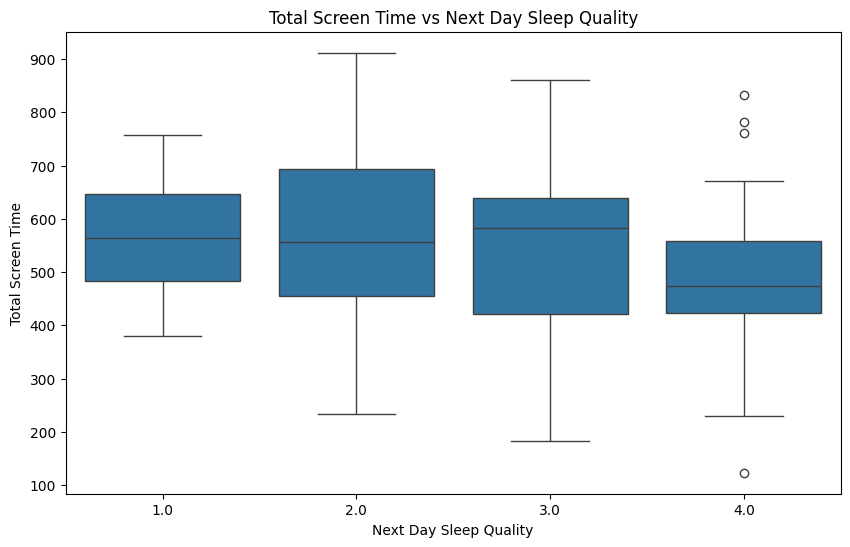

In [225]:
# Print Spearman's Rank Correlation between Total Screen Time and Target_Sleep_Quality
spearman_corr, p_value = stats.spearmanr(df['Total Screen Time'], df['SleepQualityNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation: {spearman_corr:.4f}, p-value: {p_value:.4f}")
# Box Plot for Total Screen Time and Target_Sleep_Quality
plt.figure(figsize=(10, 6))
sns.boxplot(y='Total Screen Time', x='SleepQualityNextDay', data=df)
plt.title('Total Screen Time vs Next Day Sleep Quality')
plt.xlabel('Next Day Sleep Quality')
plt.ylabel('Total Screen Time')
plt.show()

Spearman's Rank Correlation: -0.4211, p-value: 0.0000


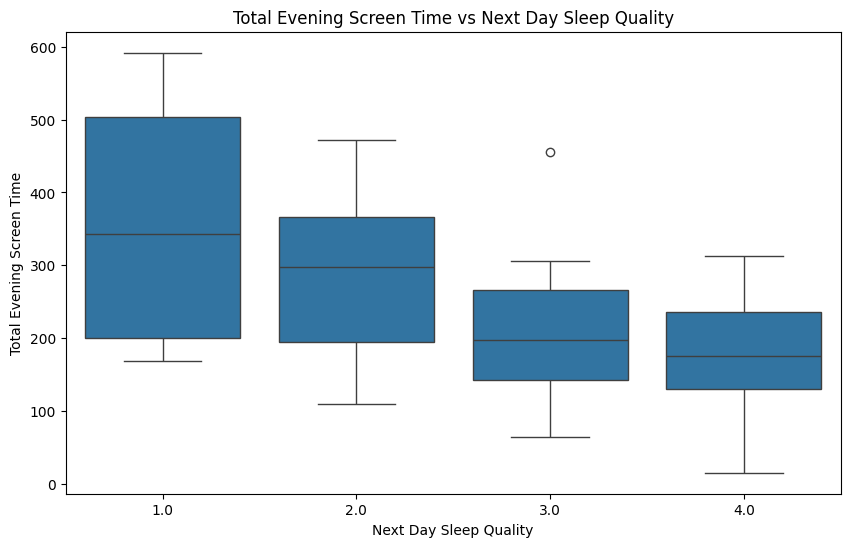

In [226]:
# Print Spearman's Rank Correlation between Total Evening Screen Time and Target_Sleep_Quality
spearman_corr, p_value = stats.spearmanr(df['Effective Evening Screen Time'], df['SleepQualityNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation: {spearman_corr:.4f}, p-value: {p_value:.4f}")
# Box Plot for Total Evening Screen Time and Target_Sleep_Quality
plt.figure(figsize=(10, 6))
sns.boxplot(y='Effective Evening Screen Time', x='SleepQualityNextDay', data=df)
plt.title('Total Evening Screen Time vs Next Day Sleep Quality')
plt.xlabel('Next Day Sleep Quality')
plt.ylabel('Total Evening Screen Time')
plt.show()

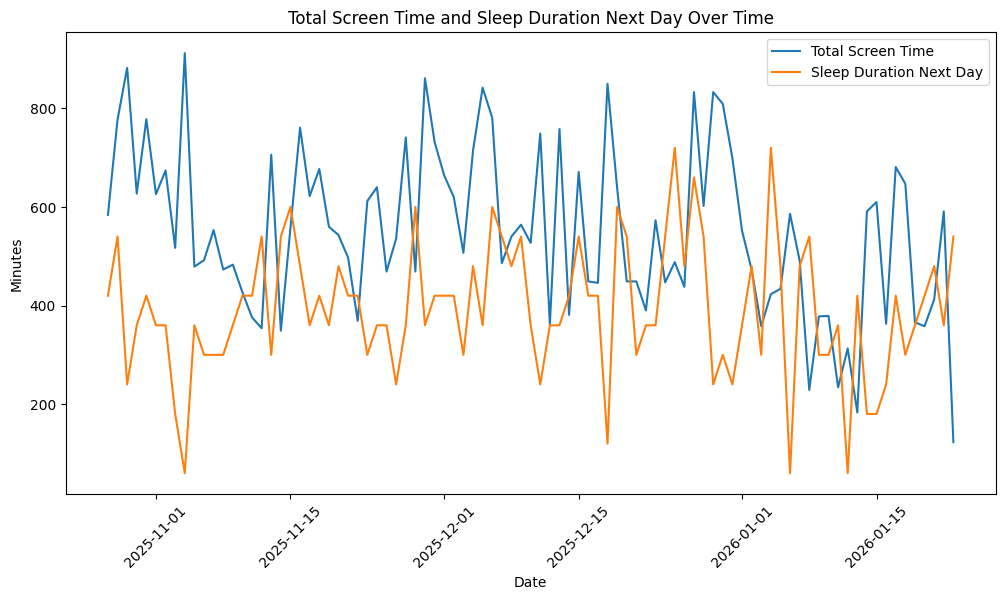

In [227]:
# Time Series Plot of Total Screen Time and Sleep Duration Next Day
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total Screen Time', data=df, label='Total Screen Time')
sns.lineplot(x='Date', y='SleepDurationMinutesNextDay', data=df, label='Sleep Duration Next Day')
plt.title('Total Screen Time and Sleep Duration Next Day Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.legend()

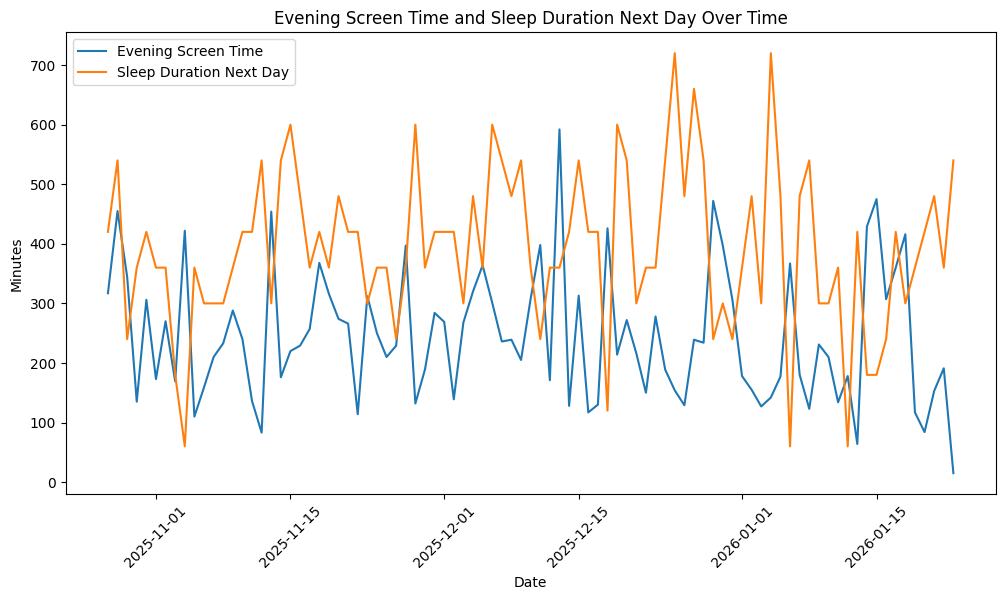

In [228]:
# Time Series Plot of Evening Screen Time and Sleep Duration Next Day
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Effective Evening Screen Time', data=df, label='Evening Screen Time')
sns.lineplot(x='Date', y='SleepDurationMinutesNextDay', data=df, label='Sleep Duration Next Day')
plt.title('Evening Screen Time and Sleep Duration Next Day Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.legend()

Pearson's Correlation: -0.1852, p-value: 0.0823


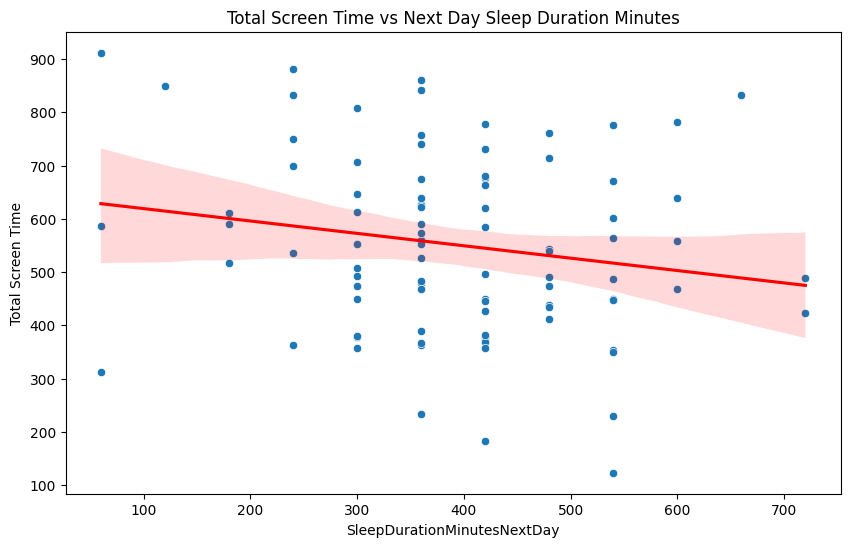

In [229]:
# Print Pearson's  Correlation between Total Screen Time and Target_Sleep_Quality
Pearson_corr, p_value = stats.pearsonr(df['Total Screen Time'], df['SleepDurationMinutesNextDay'])
print(f"Pearson's Correlation: {Pearson_corr:.4f}, p-value: {p_value:.4f}")
# Box Plot for Total Screen Time and Target_Sleep_Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Total Screen Time', x='SleepDurationMinutesNextDay', data=df)
plt.title('Total Screen Time vs Next Day Sleep Duration Minutes')
plt.xlabel('Next Day Sleep Duration Minutes')
plt.ylabel('Total Screen Time')
# Shpw Best Fit Line
sns.regplot(y='Total Screen Time', x='SleepDurationMinutesNextDay', data=df, scatter=False, color='red')
plt.show()

Pearson's Correlation: -0.3884, p-value: 0.0002


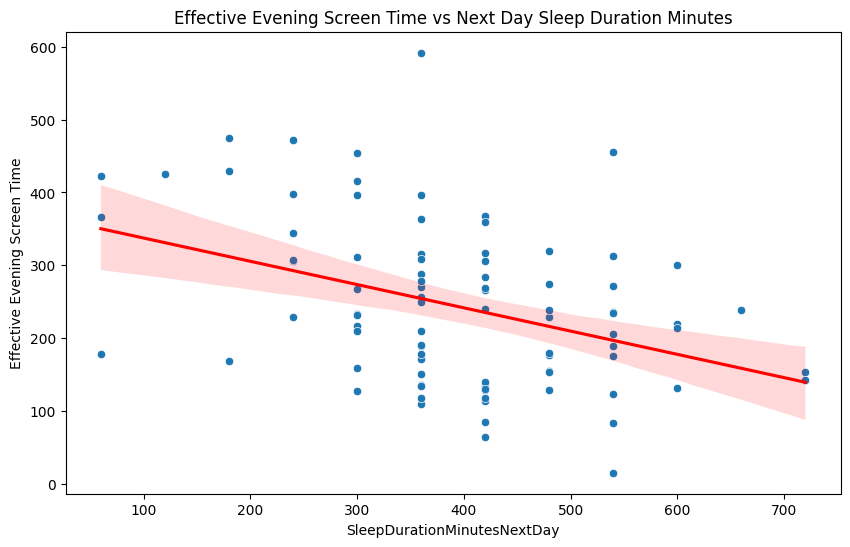

In [230]:
# Print Pearson's  Correlation between Effective Evening Screen Time and Target_Sleep_Quality
Pearson_corr, p_value = stats.pearsonr(df['Effective Evening Screen Time'], df['SleepDurationMinutesNextDay'])
print(f"Pearson's Correlation: {Pearson_corr:.4f}, p-value: {p_value:.4f}")
# Box Plot for Effective Evening Screen Time and Target_Sleep_Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Effective Evening Screen Time', x='SleepDurationMinutesNextDay', data=df)
plt.title('Effective Evening Screen Time vs Next Day Sleep Duration Minutes')
plt.xlabel('Next Day Sleep Duration Minutes')
plt.ylabel('Effective Evening Screen Time')
# Show best fit line
sns.regplot(y='Effective Evening Screen Time', x='SleepDurationMinutesNextDay', data=df, scatter=False, color='red')
plt.show()

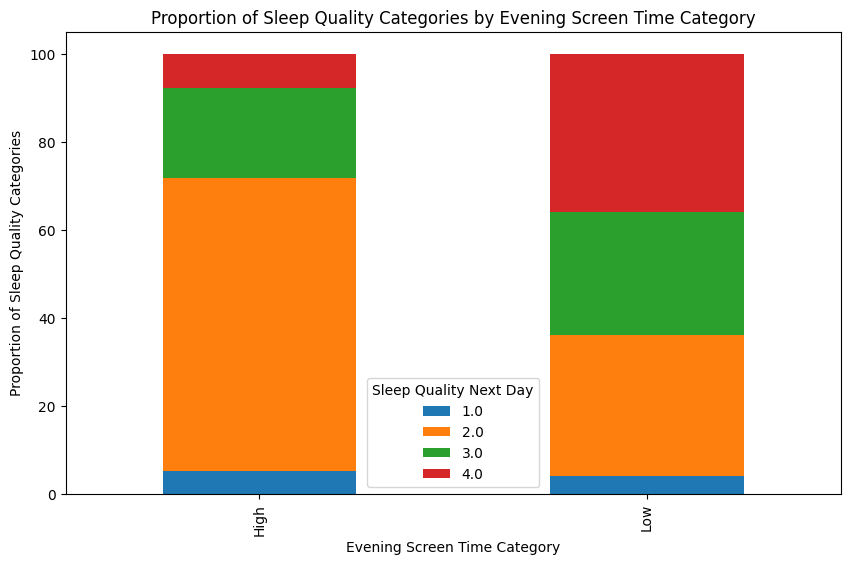

In [231]:
# Stacked Bar Chart for Showing the Proportion of Sleep Quality Categories for Different Levels of Evening Screen Time Category. Place a Proportion on  each bar segment to show the proportion of each sleep quality category within each evening screen time category
crosstab = pd.crosstab(df['Evening Screen Time Category'], df['SleepQualityNextDay'], normalize='index') * 100
# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Sleep Quality Categories by Evening Screen Time Category')
plt.xlabel('Evening Screen Time Category')
plt.ylabel('Proportion of Sleep Quality Categories')
plt.legend(title='Sleep Quality Next Day')
plt.show()

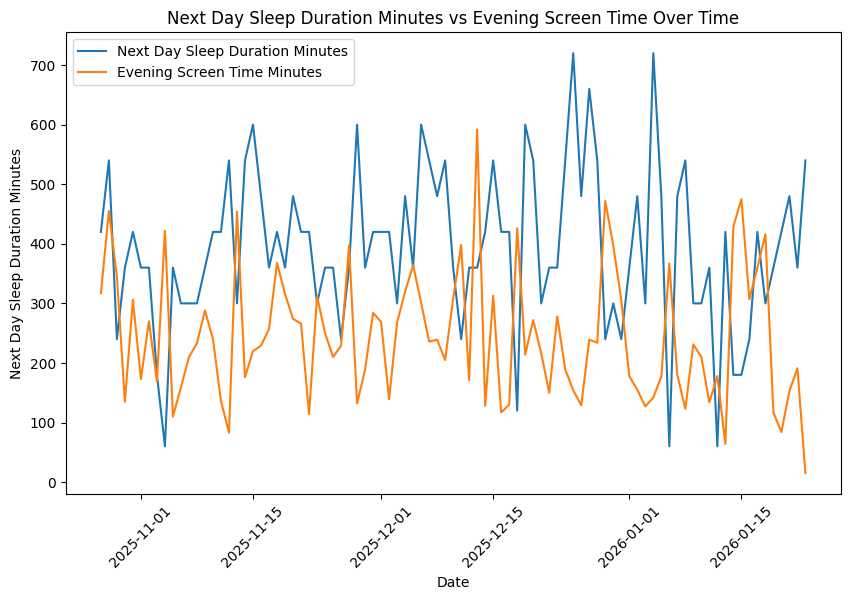

In [232]:
# Plot Time-Series Trend of Next Day Sleep Duration Minutes vs Evening Screen  distribution
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='SleepDurationMinutesNextDay', data=df, label='Next Day Sleep Duration Minutes')
sns.lineplot(x='Date', y='Effective Evening Screen Time', data=df, label='Evening Screen Time Minutes')
plt.title('Next Day Sleep Duration Minutes vs Evening Screen Time Over Time')
plt.xlabel('Date')
plt.ylabel('Next Day Sleep Duration Minutes')
plt.xticks(rotation=45)
plt.show()

In [233]:
# Export df.describe() to csv. Switch columns and index to have features as rows and statistics as columns
# df.describe().T.to_csv('C:\\Users\\Blix\\Documents\\GitHub\\CCDATSCL_PROJECT\\descriptive_statistics.csv')

In [234]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Create new features with scaled values for Effective Evening Screen Time, Total Screen Time, Daytime Screen Time, and Steps
df[['TEST_z', 'TST_z', 'DST_z', 'Steps_z']] = scaler.fit_transform(df[['Effective Evening Screen Time', 'Total Screen Time', 'Daytime Screen Time', 'Steps']])

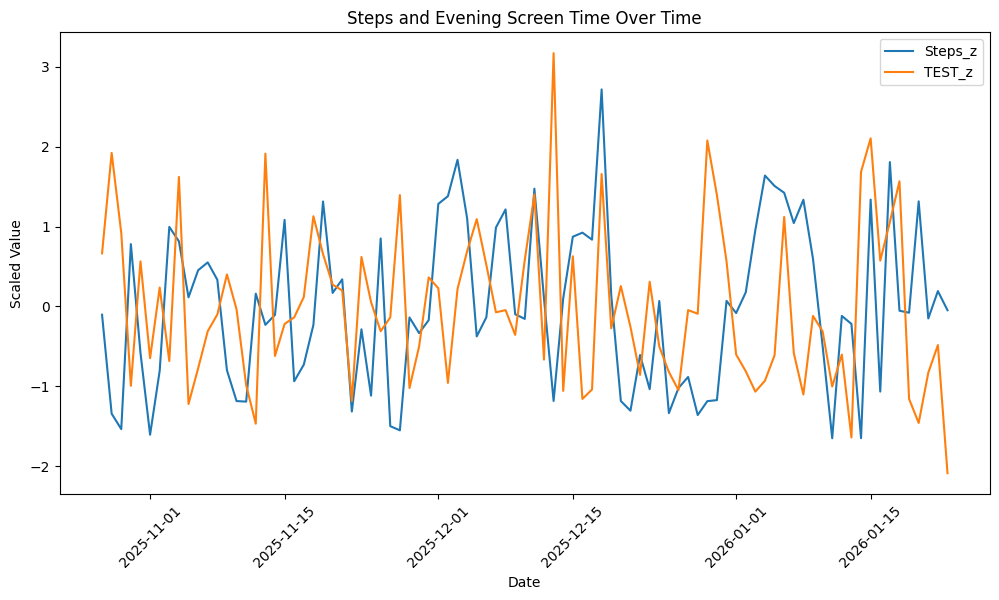

In [235]:
# Plot time series of Steps_z and TST_z over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Steps_z', data=df, label='Steps_z')
sns.lineplot(x='Date', y='TEST_z', data=df, label='TEST_z')
plt.title('Steps and Evening Screen Time Over Time')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [236]:
df['SleepDurationMinutesNextDay_z'] = scaler.fit_transform(df[['SleepDurationMinutesNextDay']])

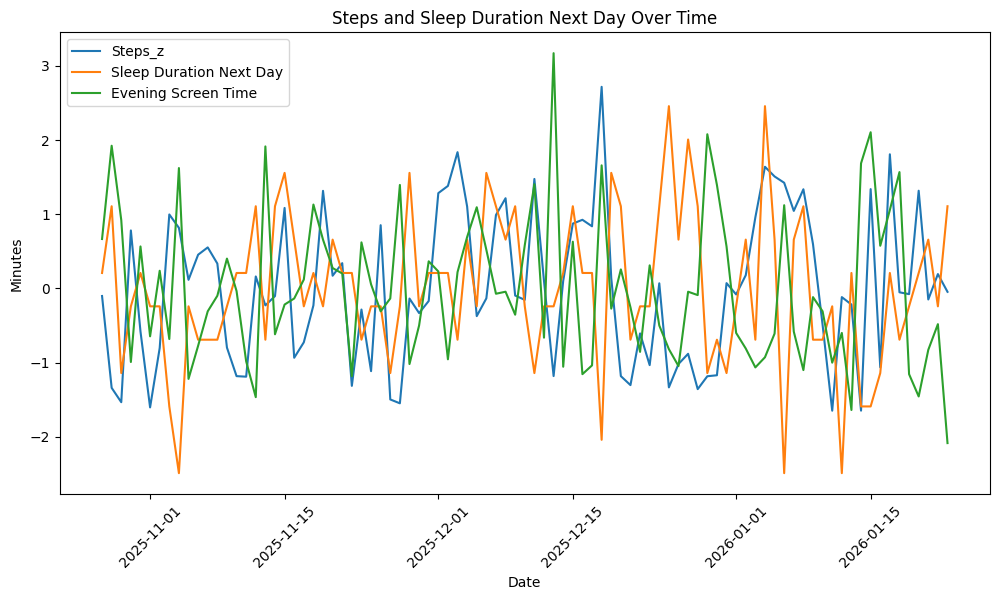

In [237]:
# Plot Time Series of Steps_z and SleepDurationMinutesNextDay
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Steps_z', data=df, label='Steps_z')
sns.lineplot(x='Date', y='SleepDurationMinutesNextDay_z', data=df, label='Sleep Duration Next Day')
sns.lineplot(x='Date', y='TEST_z', data=df, label='Evening Screen Time')
plt.title('Steps and Sleep Duration Next Day Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.legend()
plt.show()

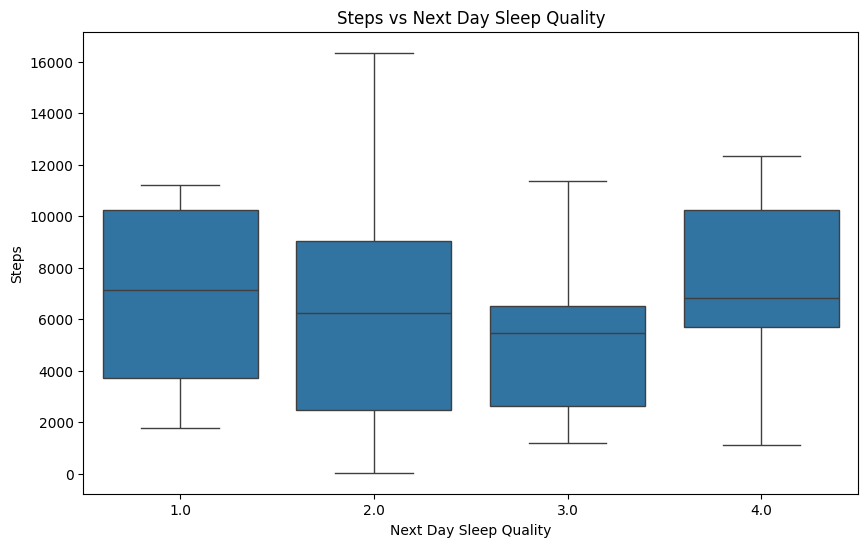

In [238]:
# Check boxplots of Steps per Sleep Quality Next Day
plt.figure(figsize=(10, 6))
sns.boxplot(y='Steps', x='SleepQualityNextDay', data=df)
plt.title('Steps vs Next Day Sleep Quality')
plt.xlabel('Next Day Sleep Quality')
plt.ylabel('Steps')
plt.show()

In [239]:
# Features for correlational Analysis
spearman_features = ['Total Screen Time', 'Effective Evening Screen Time', 'Daytime Screen Time', 'Social Media Usage', 'Games Usage', 'InteractiveScreenTime', 'NonInteractiveScreenTime', '0 to 6', '6 to 12', '12 to 18', '18 to 24', 'SleepQualityNextDay', 'SleepQualityNextNextDay']
pearson_features = ['Total Screen Time', 'Effective Evening Screen Time', 'Daytime Screen Time', 'Social Media Usage', 'Games Usage', 'InteractiveScreenTime', 'NonInteractiveScreenTime', '0 to 6', '6 to 12', '12 to 18', '18 to 24', 'SleepDurationMinutesNextDay']

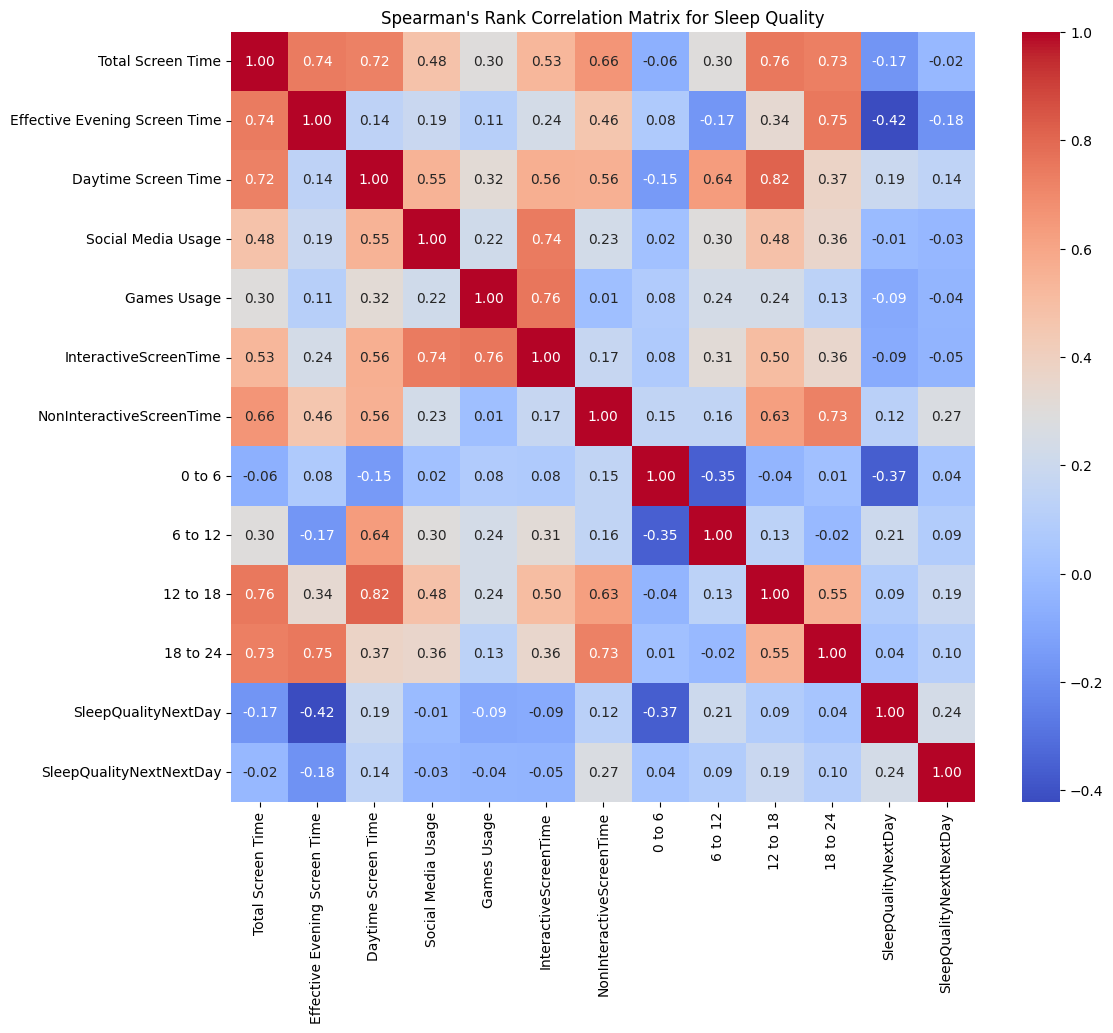

In [240]:
# Plot Spearman's Rank Correlation Matrix against SleepQualityNextDay using only the features in features_correlational
plt.figure(figsize=(12, 10))
spearman_corr_matrix = df[spearman_features].corr(method='spearman')
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Spearman's Rank Correlation Matrix for Sleep Quality")
plt.show()

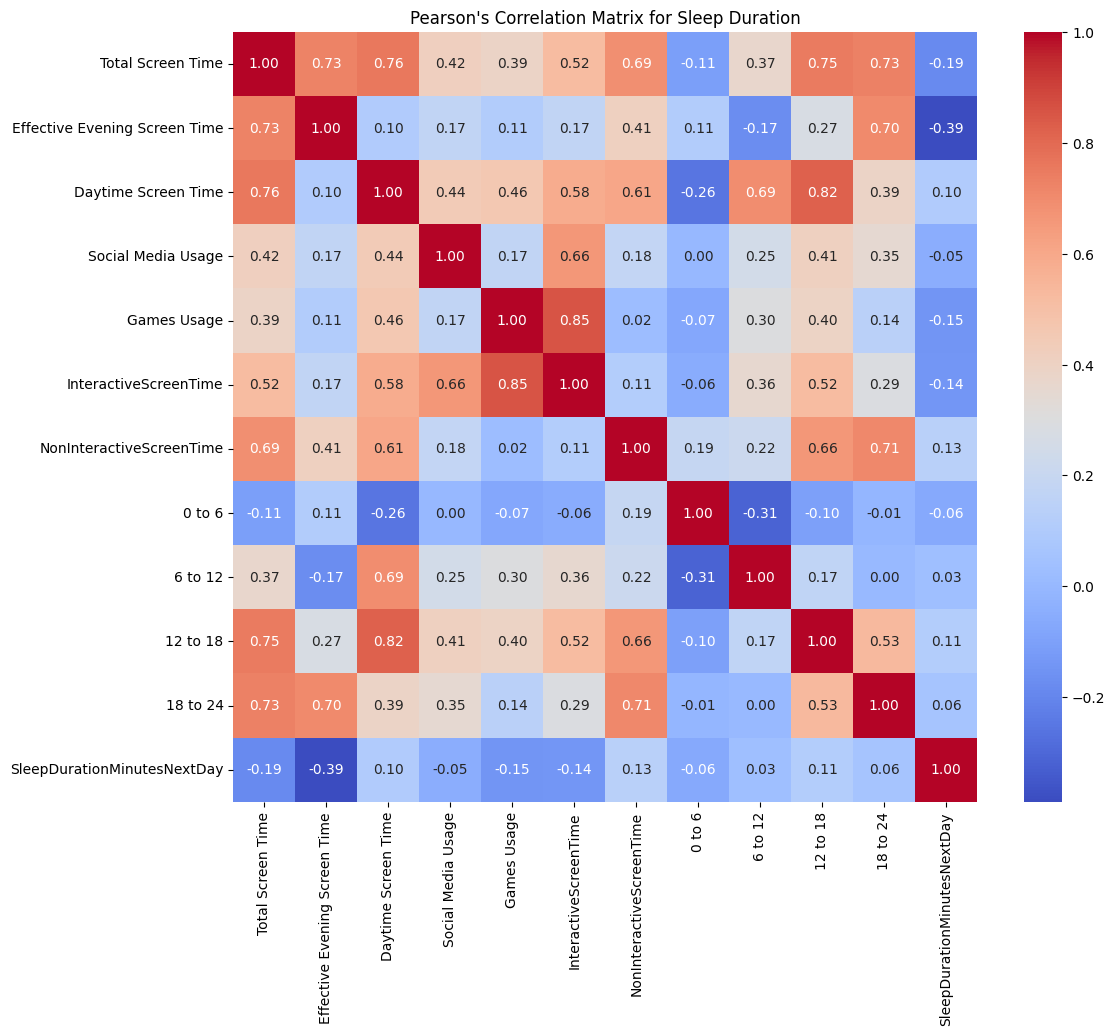

In [241]:
# Plot Pearson's Correlation Matrix against SleepDurationMinutesNextDay using only the features in features_correlational
plt.figure(figsize=(12, 10))
pearson_corr_matrix = df[pearson_features].corr(method='pearson')
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Pearson's Correlation Matrix for Sleep Duration")
plt.show()

## Statistical Tests

In [ ]:
# Perform a Independent-Samples T-test for the following question:
# Is there a significant difference in self-reported sleep quality when exceeding the 240-minute pre-sleep screen time threshold?
# Ho: There is no statistically significant difference in the distribution of sleep quality scores between days characterized by high (>240 mins) and low (<=240 mins) evening screen time.
# Ha: Sleep quality scores are significantly higher on days characterized by low evening screen time compared to days with high evening screen time.
# Use Shapiro Wilk test to check normality of Sleep Quality Next-Day for all
low_screen_time = df[df['Evening Screen Time Category'] == 'Low']['SleepQualityNextDay'].dropna()
high_screen_time = df[df['Evening Screen Time Category'] == 'High']['SleepQualityNextDay'].dropna()
shapiro_low = stats.shapiro(low_screen_time)
shapiro_high = stats.shapiro(high_screen_time)
print(f"Shapiro-Wilk Test for Low Evening Screen Time: W={shapiro_low.statistic:.4f}, p-value={shapiro_low.pvalue:.4f}")
print(f"Shapiro-Wilk Test for High Evening Screen Time: W={shapiro_high.statistic:.4f}, p-value={shapiro_high.pvalue:.4f}")


# Since both p-values are less than 0.05, we reject the null hypothesis of normality.
# Therefore, we will use the non-parametric Mann-Whitney U test instead of the t-test.
mannwhitney_result = stats.mannwhitneyu(low_screen_time, high_screen_time, alternative='greater')
# Calculate Effect Size (r) for Mann-Whitney U
import numpy as np

u_stat = mannwhitney_result.statistic
n1 = len(low_screen_time)
n2 = len(high_screen_time)

# Z-score approximation for large samples (n > 20)
z_score = (u_stat - (n1 * n2 / 2)) / np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
effect_size_r = abs(z_score) / np.sqrt(n1 + n2)

# Print Effect Size and Mann-Whitney U Test Results
print(f"Z-score: {z_score:.4f}")
# Print sample sizes for both groups
print(f"Sample Size (Low Evening Screen Time): {n1}")
print(f"Sample Size (High Evening Screen Time): {n2}")
print(f"Effect Size r: {effect_size_r:.4f}")
print(f"Mann-Whitney U Test: U={mannwhitney_result.statistic}, p-value={mannwhitney_result.pvalue:.4f}")
# Print Median Sleep Quality for Low and High Evening Screen Time Groups
median_low = low_screen_time.median()
median_high = high_screen_time.median()
print(f"Median Sleep Quality for Low Evening Screen Time: {median_low}")
print(f"Median Sleep Quality for High Evening Screen Time: {median_high}")

Shapiro-Wilk Test for Low Evening Screen Time: W=0.8328, p-value=0.0000
Shapiro-Wilk Test for High Evening Screen Time: W=0.7410, p-value=0.0000
Z-score: 3.2249
Sample Size (Low Evening Screen Time): 50
Sample Size (High Evening Screen Time): 39
Effect Size r: 0.3418
Mann-Whitney U Test: U=1365.0, p-value=0.0003
Median Sleep Quality for Low Evening Screen Time: 3.0
Median Sleep Quality for High Evening Screen Time: 2.0


In [243]:
# Drop null values
df.dropna(subset=['Effective Evening Screen Time', 'SleepQualityNextNextDay'], inplace=True)

In [244]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
# Fit Ordered Logistic Regression
# We model Sleep Quality as the dependent variable
df['SleepQualityNextDay'] = df['SleepQualityNextDay'].dropna()
model = OrderedModel(df['SleepQualityNextDay'], 
                     df[['TST_z', 'TEST_z']], 
                     distr='logit')
res = model.fit(method='bfgs')

# 4. Results
print(res.summary())
# Calculate and print odds ratios
params = res.params
odds_ratios = np.exp(params)
print("\nOdds Ratios:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 1.013551
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
                              OrderedModel Results                             
Dep. Variable:     SleepQualityNextDay   Log-Likelihood:                -90.206
Model:                    OrderedModel   AIC:                             190.4
Method:             Maximum Likelihood   BIC:                             202.9
Date:                 Wed, 18 Feb 2026                                         
Time:                         00:22:15                                         
No. Observations:                   89                                         
Df Residuals:                       84                                         
Df Model:                            2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

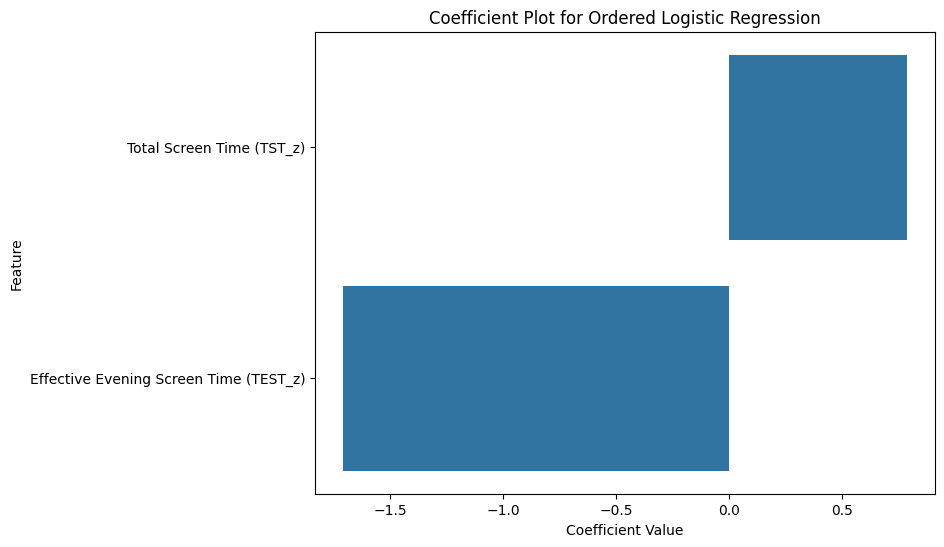

In [245]:
# Plot Coefficient Plot for the Ordered Logistic Regression Model
# Select only the first 2 parameters (your features)
feature_params = res.params.iloc[:2]

coef_df = pd.DataFrame({
    'Feature': ['Total Screen Time (TST_z)', 'Effective Evening Screen Time (TEST_z)'],
    'Coefficient': feature_params.values,
    'Odds Ratio': np.exp(feature_params.values)
})

# ... rest of your plotting code ...
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, orient='h')
plt.title('Coefficient Plot for Ordered Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [246]:
# 4. STATISTICAL COMPARISON (Spearman Correlation)
# Assessing the strength of association for both
rho_total, p_total = stats.spearmanr(df['Total Screen Time'], df['SleepQualityNextDay'], nan_policy='omit')
rho_evening, p_evening = stats.spearmanr(df['Effective Evening Screen Time'], df['SleepQualityNextDay'], nan_policy='omit')

print(f"Total Screen Time (TST) Correlation with Sleep Quality: {rho_total:.3f} (p={p_total:.4f})")
print(f"Evening Screen Time (TEST) Correlation with Sleep Quality: {rho_evening:.3f} (p={p_evening:.4f})")

# 5. STEP 2 ANALYSIS: WHICH IS STRONGER?
if abs(rho_evening) > abs(rho_total):
    print("\nCONCLUSION: Evening Screen Time is more strongly associated with sleep disturbances.")
else:
    print("\nCONCLUSION: Total Daily Volume is more strongly associated with sleep disturbances.")

Total Screen Time (TST) Correlation with Sleep Quality: -0.173 (p=0.1050)
Evening Screen Time (TEST) Correlation with Sleep Quality: -0.421 (p=0.0000)

CONCLUSION: Evening Screen Time is more strongly associated with sleep disturbances.


In [247]:
# Fit Multiple Linear Regression
# We model Sleep Duration Minutes as the dependent variable
import statsmodels.api as sm
X = df[['TST_z', 'TEST_z']]
y = df['SleepDurationMinutesNextDay']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     SleepDurationMinutesNextDay   R-squared:                       0.171
Model:                                     OLS   Adj. R-squared:                  0.151
Method:                          Least Squares   F-statistic:                     8.840
Date:                         Wed, 18 Feb 2026   Prob (F-statistic):           0.000323
Time:                                 00:22:15   Log-Likelihood:                -553.49
No. Observations:                           89   AIC:                             1113.
Df Residuals:                               86   BIC:                             1120.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

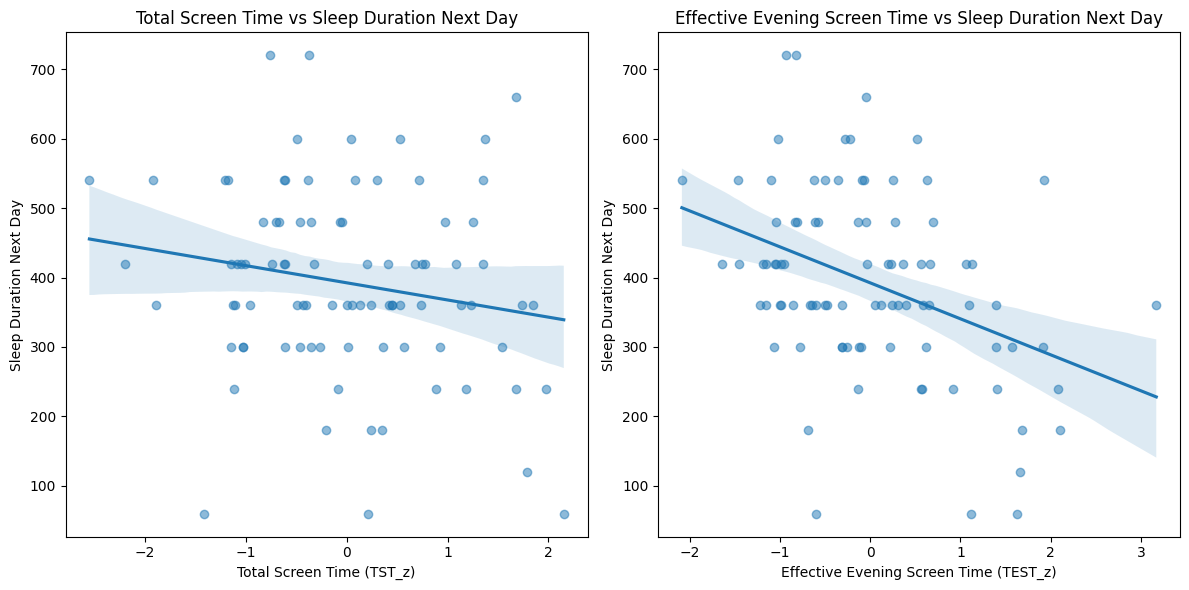

In [248]:
# Plot a Regression Slope Plot for Total Screen Time and Evening Screen Time and Sleep Duration Next Day
plt.figure(figsize=(12, 6))

# Plot for Total Screen Time
plt.subplot(1, 2, 1)
sns.regplot(x='TST_z', y='SleepDurationMinutesNextDay', data=df, scatter_kws={'alpha':0.5})
plt.title('Total Screen Time vs Sleep Duration Next Day')
plt.xlabel('Total Screen Time (TST_z)')
plt.ylabel('Sleep Duration Next Day')

# Plot for Effective Evening Screen Time
plt.subplot(1, 2, 2)
sns.regplot(x='TEST_z', y='SleepDurationMinutesNextDay', data=df, scatter_kws={'alpha':0.5})
plt.title('Effective Evening Screen Time vs Sleep Duration Next Day')
plt.xlabel('Effective Evening Screen Time (TEST_z)')
plt.ylabel('Sleep Duration Next Day')

plt.tight_layout()
plt.show()

In [249]:
# Check correlation of Total Screen Time and Effective Evening Screen Time with SleepDurationMinutesNextDay using Pearson correlation
pearson_tst = stats.pearsonr(df['Total Screen Time'], df['SleepDurationMinutesNextDay'])
pearson_test = stats.pearsonr(df['Effective Evening Screen Time'], df['SleepDurationMinutesNextDay'])
print(f"Total Screen Time (TST) and SleepDurationMinutesNextDay: r={pearson_tst[0]:.3f}, p={pearson_tst[1]:.4f}")
print(f"Effective Evening Screen Time (TEST) and SleepDurationMinutesNextDay: r={pearson_test[0]:.3f}, p={pearson_test[1]:.4f}")

if abs(pearson_test[0]) > abs(pearson_tst[0]):
    print("\nCONCLUSION: Evening Screen Time is more strongly correlated with next day sleep duration.")
else:
    print("\nCONCLUSION: Total Screen Time is more strongly correlated with next day sleep duration.")


Total Screen Time (TST) and SleepDurationMinutesNextDay: r=-0.185, p=0.0823
Effective Evening Screen Time (TEST) and SleepDurationMinutesNextDay: r=-0.388, p=0.0002

CONCLUSION: Evening Screen Time is more strongly correlated with next day sleep duration.


In [250]:
# Correlational Analysis of Evening Screen Time and Sleep Quality Next-Next-Day
rho_next_next, p_next_next = stats.spearmanr(df['Effective Evening Screen Time'], df['SleepQualityNextNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Next-Day): {rho_next_next:.4f}, p-value: {p_next_next:.4f}")

Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Next-Day): -0.1833, p-value: 0.0855


In [251]:
# Correlational Analysis of Total Screen Time and Sleep Quality Next-Next-Day
rho_total_next_next, p_total_next_next = stats.spearmanr(df['Total Screen Time'], df['SleepQualityNextNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation (Total Screen Time vs Sleep Quality Next-Next-Day): {rho_total_next_next:.4f}, p-value: {p_total_next_next:.4f}")

Spearman's Rank Correlation (Total Screen Time vs Sleep Quality Next-Next-Day): -0.0227, p-value: 0.8329


In [252]:
# Correlational Analysis of Interactive Screen Time and Sleep Quality Next-Next-Day
rho_interactive_next_next, p_interactive_next_next = stats.spearmanr(df['InteractiveScreenTime'], df['SleepQualityNextNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation (Interactive Screen Time vs Sleep Quality Next-Next-Day): {rho_interactive_next_next:.4f}, p-value: {p_interactive_next_next:.4f}")

Spearman's Rank Correlation (Interactive Screen Time vs Sleep Quality Next-Next-Day): -0.0452, p-value: 0.6744


In [253]:
# Perform Cross-Lagged Correlation Analysis to Assess Temporal Relationships
# Correlation of Evening Screen Time with Sleep Quality Next-Day
rho_evening_next, p_evening_next = stats.spearmanr(df['Effective Evening Screen Time'], df['SleepQualityNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Day): {rho_evening_next:.4f}, p-value: {p_evening_next:.4f}")
rho_evening_next_next, p_evening_next_next = stats.spearmanr(df['Effective Evening Screen Time'], df['SleepQualityNextNextDay'], nan_policy='omit')
print(f"Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Next-Day): {rho_evening_next_next:.4f}, p-value: {p_evening_next_next:.4f}")

Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Day): -0.4211, p-value: 0.0000
Spearman's Rank Correlation (Evening Screen Time vs Sleep Quality Next-Next-Day): -0.1833, p-value: 0.0855


In [254]:
import pandas as pd
from scipy import stats

# 4. THE TEST:
# Run Spearman because we are dealing with a 1-4 scale
rho_evening, p_val = stats.spearmanr(df['Effective Evening Screen Time'], df['SleepQualityNextNextDay'])
rho_daytime, p_daytime = stats.spearmanr(df['Daytime Screen Time'], df['SleepQualityNextNextDay'])
rho_total, p_total = stats.spearmanr(df['Total Screen Time'], df['SleepQualityNextNextDay'])
rho_interactive, p_interactive = stats.spearmanr(df['InteractiveScreenTime'], df['SleepQualityNextNextDay'])
rho_noninteractive, p_noninteractive = stats.spearmanr(df['NonInteractiveScreenTime'], df['SleepQualityNextNextDay'])
rho_social, p_social = stats.spearmanr(df['Social Media Usage'], df['SleepQualityNextNextDay'])
rho_games, p_games = stats.spearmanr(df['Games Usage'], df['SleepQualityNextNextDay'])

print(f"Temporal (Lagged) Correlation (Evening Screen Time): {rho_evening:.3f}, p-value: {p_val:.4f}")
print(f"Temporal (Lagged) Correlation (Daytime Screen Time): {rho_daytime:.3f}, p-value: {p_daytime:.4f}")
print(f"Temporal (Lagged) Correlation (Total Screen Time): {rho_total:.3f}, p-value: {p_total:.4f}")
print(f"Temporal (Lagged) Correlation (Interactive Screen Time): {rho_interactive:.3f}, p-value: {p_interactive:.4f}")
print(f"Temporal (Lagged) Correlation (Non-Interactive Screen Time): {rho_noninteractive:.3f}, p-value: {p_noninteractive:.4f}")
print(f"Temporal (Lagged) Correlation (Social Media Usage): {rho_social:.3f}, p-value: {p_social:.4f}")
print(f"Temporal (Lagged) Correlation (Games Usage): {rho_games:.3f}, p-value: {p_games:.4f}")

p_values = {
    'Evening Screen Time': p_val,
    'Daytime Screen Time': p_daytime,
    'Total Screen Time': p_total,
    'Interactive Screens Time': p_interactive,
    'Non-Interactive Screen Time': p_noninteractive,
    'Social Media Usage': p_social,
    'Games Usage': p_games
}
significant_results = {k: v for k, v in p_values.items() if v < 0.05}
if significant_results:
    print("\nSignificant Temporal Correlations Found:")
    for metric, p in significant_results.items():
        print(f"- {metric} (p-value: {p:.4f})")
else:
    print("\nNo significant temporal correlations found between screen time metrics and next-next-day sleep quality.")

Temporal (Lagged) Correlation (Evening Screen Time): -0.183, p-value: 0.0855
Temporal (Lagged) Correlation (Daytime Screen Time): 0.143, p-value: 0.1819
Temporal (Lagged) Correlation (Total Screen Time): -0.023, p-value: 0.8329
Temporal (Lagged) Correlation (Interactive Screen Time): -0.045, p-value: 0.6744
Temporal (Lagged) Correlation (Non-Interactive Screen Time): 0.269, p-value: 0.0109
Temporal (Lagged) Correlation (Social Media Usage): -0.032, p-value: 0.7664
Temporal (Lagged) Correlation (Games Usage): -0.041, p-value: 0.7028

Significant Temporal Correlations Found:
- Non-Interactive Screen Time (p-value: 0.0109)


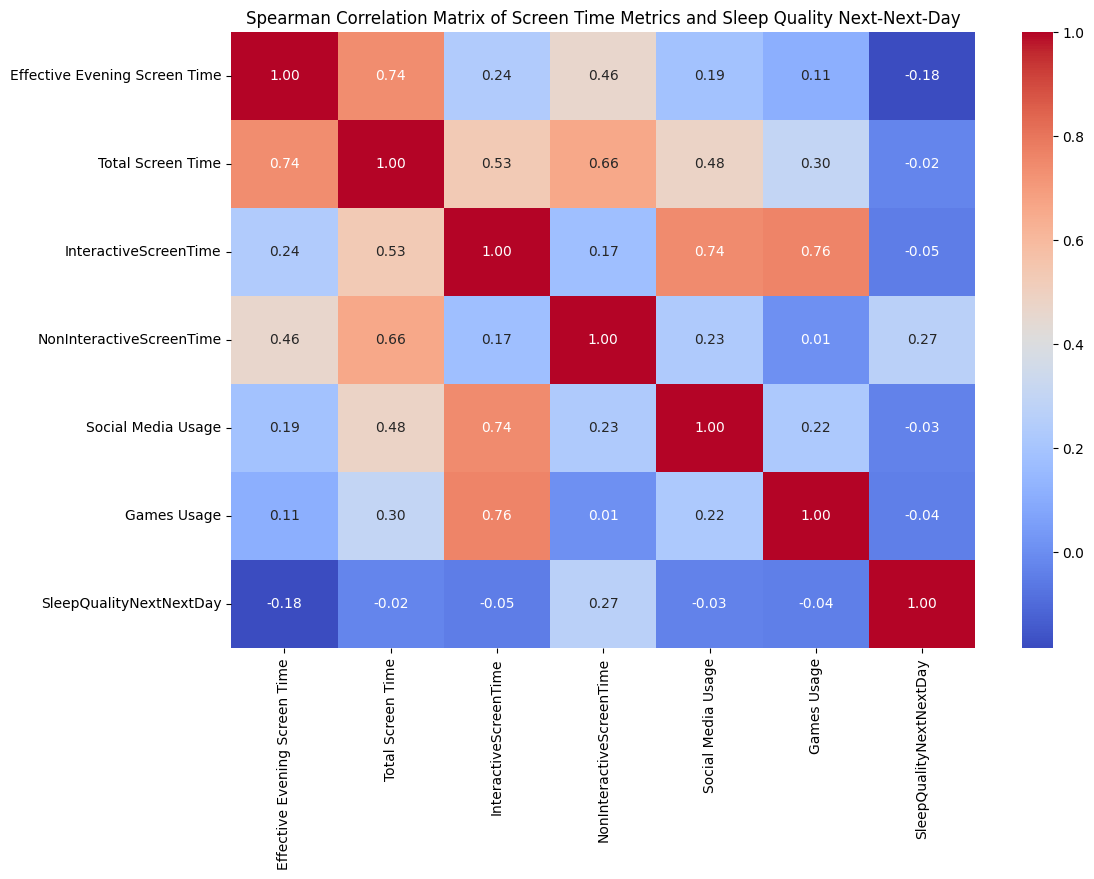

In [255]:
# Show correlational heatmap of all screen time metrics with Sleep Quality Next-Next-Day
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Effective Evening Screen Time', 'Total Screen Time', 'InteractiveScreenTime', 'NonInteractiveScreenTime', 'Social Media Usage', 'Games Usage', 'SleepQualityNextNextDay']].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix of Screen Time Metrics and Sleep Quality Next-Next-Day')
plt.show()

In [256]:
df['Steps'].describe()

count       89.000000
mean      6195.629213
std       3756.933546
min         36.000000
25%       2900.000000
50%       5889.000000
75%       9376.000000
max      16342.000000
Name: Steps, dtype: float64

In [257]:
df['Interaction'] = df['TEST_z'] * df['Steps_z']

# 4. FIT THE MODERATED ORDERED LOGISTIC REGRESSION
# Define predictors: Screens, Steps, and the Interaction
X = df[['TEST_z', 'Steps_z', 'Interaction']]
y = df['SleepQualityNextDay']

# Clean NaNs resulting from shifts
valid_idx = y.dropna().index.intersection(X.dropna().index)
X_clean = X.loc[valid_idx]
y_clean = y.loc[valid_idx]

mod_model = OrderedModel(y_clean, X_clean, distr='logit')
res = mod_model.fit(method='bfgs')

print(res.summary())

# Calculate and print odds ratios
params = res.params
odds_ratios = np.exp(params)
print("\nOdds Ratios:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 1.045919
         Iterations: 19
         Function evaluations: 21
         Gradient evaluations: 21
                              OrderedModel Results                             
Dep. Variable:     SleepQualityNextDay   Log-Likelihood:                -93.087
Model:                    OrderedModel   AIC:                             198.2
Method:             Maximum Likelihood   BIC:                             213.1
Date:                 Wed, 18 Feb 2026                                         
Time:                         00:22:15                                         
No. Observations:                   89                                         
Df Residuals:                       83                                         
Df Model:                            3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

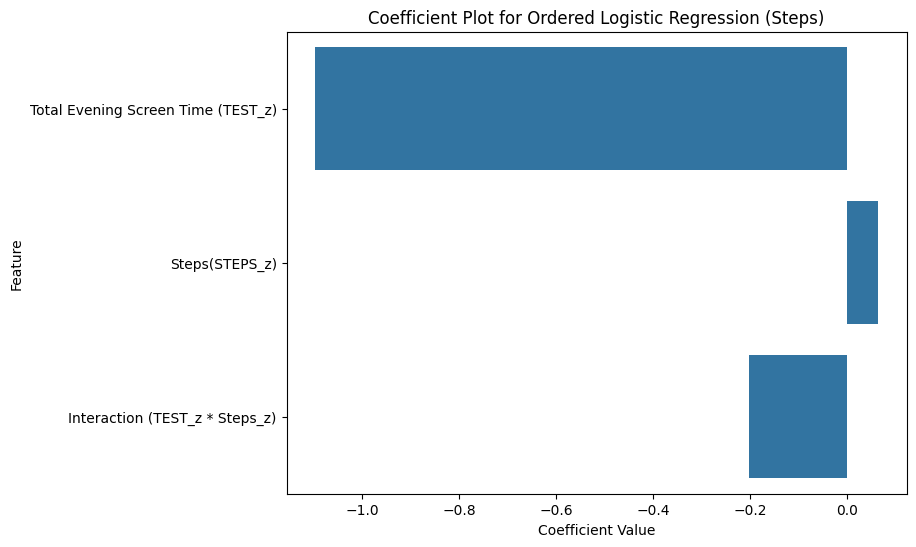

In [258]:
# Plot Coefficient Plot for the Ordered Logistic Regression Model
# Select only the first 3 parameters (your features)
feature_params = res.params.iloc[:3]

coef_df = pd.DataFrame({
    'Feature': ['Total Evening Screen Time (TEST_z)', 'Steps(STEPS_z)', 'Interaction (TEST_z * Steps_z)'],
    'Coefficient': feature_params.values,
    'Odds Ratio': np.exp(feature_params.values)
})

# ... rest of your plotting code ...
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, orient='h')
plt.title('Coefficient Plot for Ordered Logistic Regression (Steps)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()